# Polynomial Regression

- Polynomial regression fits a nonlinear relationship between variables
- This is used as Linear Regression does not work well with nonlinear relationships

In [1]:
%matplotlib inline                    
import numpy as np                          # Numpy is a library mainly used for working with arrays
import pandas as pd                         # Pandas is a Python library mainly used for working with data sets 
import matplotlib.pyplot as plt             # Matplot lib is used for plotting, in this case pyplot will be used to create a scatter plot
import io                                   # Needed to upload file from local storage
 

from google.colab import files
uploaded = files.upload()
dataset = pd.read_csv(io.BytesIO(uploaded['HSE_Salary.csv']))   # Variable called dataset is now assigned the values of csv "HSE_Salary.csv" file

dataset.head()                              # This function acts as a test to see did the file upload correctly, if so it will display the first 5 rows of data

,Index,Grade Description,Pay
0,1,PHLEBOTOMIST TRAINEE,20767
1,2,STUDENT MENTAL HEALTH NURSE\n(ROSTERED PLACEMENT),22729
2,3,"E.C.G. TECHNICIAN, STUDENT",24451
3,4,PHARMACY STUDENT,25398
4,5,"PHARMACEUTICAL TECHNICIAN, STUDENT",25913


In [2]:
dataset.tail()                          # This function shows the last 5 rows of data and is included to show the highest salaries and job titles in the dataset
                                        # note that the data is actual but some of it is redundant and has been replaced by a more recent salary scale

,Index,Grade Description,Pay
437,438,"NATIONAL DIRECTOR, INTERNAL AUDIT (HSE)",156072
438,439,GENERAL MANAGER (CORK UNIVERSITY\nHOSPITAL)(GA...,156072
439,440,CHIEF EXECUTIVE (BEAUMONT)(ST. JAMES)(ST.\nVIN...,156072
440,441,NATIONAL DIRECTOR OF CORPORATE PLANNING\nAND C...,156072
441,442,HEALTH BOARD AREA CHIEF OFFICER (HSE\nEASTERN ...,160506


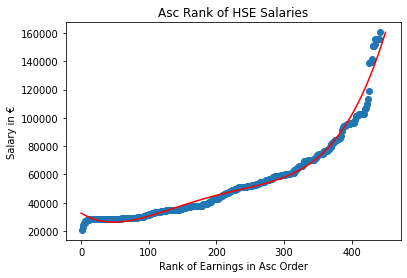

In [3]:
index = dataset["Index"]                                            # index variable is assigned the values from the index column - this is the independant variable
salaries = dataset["Pay"]                                           # salaries variable is assigned the values from the index column - this is the dependant variable
x = np.array(index)                                                 # values now assigned to a numpy array for polyfit function below
y = np.array(salaries)

fit_xy = np.polyfit(x, y, 4)            # This function takes 2 arrays, in this case x and y. The third parameter is the number of polynomials you want it to return so that the line best fits your scatter plot
polyNom = np.poly1d(fit_xy)              # This function takes one parameter and returns polynomial formula. We had to fit the x and y variables in the above function in order to pass them to np.poly1d

lineWidth = np.linspace(0,450)           # The linspace() function starts takes a start and end parameter(starts at 0 and ends at 450) There are 441 rows so 450 will cover all with a small bit more.
plt.plot(lineWidth, polyNom(lineWidth), c='r')  # Here we are plotting the line only, 

plt.scatter(index, salaries)
plt.xlabel("Rank of Earnings in Asc Order")
plt.ylabel("Salary in €")
plt.title("Asc Rank of HSE Salaries")
plt.show()



- The r_squared value shouws how well the data fit the regression model
- It can be explained as the proportion of the variance in the dependant variable that can be explained by the independant variable
- Please be aware however that the r_squared value does not disclose information about the causation relationship between the independent and dependent variables.

In [9]:
from sklearn.metrics import r2_score

r2 = r2_score(y, polyNom(x))                # The r_squared score method takes the x and y variables as parameters
r2_format = "{:.2f}".format(r2)             # This formats the r_squared value to 2 decimal places

print("The r squared value is " + str(r2_format))       # Printing the results with a print statement. The result is 0.98 or 98% 
                                                        # this can be interpreted in English as: "98% of the variance in Salaries can be explained by the ones rank in the HSE"


The r squared value is 0.98
